In [1]:
import h5py
import numpy as np
import os
import subprocess
from data_analysis_codes import param
import matplotlib.pyplot as plt
import scipy
import time
from itertools import combinations 
import pandas as pd
from multiprocessing import Pool
import re
from mpl_toolkits import mplot3d
import matplotlib.colors as colors
from ipywidgets import interact
from scipy.integrate import trapz
from scipy.integrate import simps
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import LinData

In [2]:
N = 2
np.ones((N,N,N))

array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]]])

In [36]:
def safe_division(a, b):
    return np.divide(a, b, out=np.zeros_like(a), where=b!=0)


x = np.sin(2*np.pi*np.arange(-3, 3, 0.375, dtype=float)/6)
weird_division(np.array([10]*len(x), dtype=float), x)

array([-8.16561968e+16, -2.61312593e+01, -1.41421356e+01, -1.08239220e+01,
       -1.00000000e+01, -1.08239220e+01, -1.41421356e+01, -2.61312593e+01,
        0.00000000e+00,  2.61312593e+01,  1.41421356e+01,  1.08239220e+01,
        1.00000000e+01,  1.08239220e+01,  1.41421356e+01,  2.61312593e+01])

array([-3.   , -2.625, -2.25 , -1.875, -1.5  , -1.125, -0.75 , -0.375,
        0.   ,  0.375,  0.75 ,  1.125,  1.5  ,  1.875,  2.25 ,  2.625])

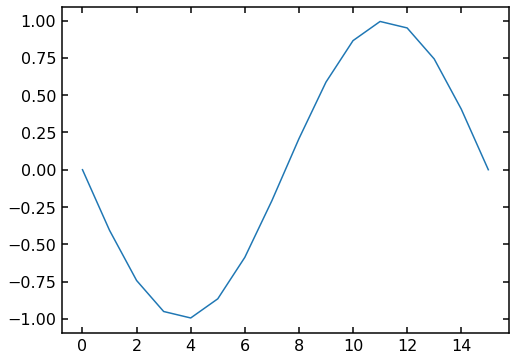

In [22]:
plt.plot(range(len(x)), x)

In [9]:
H0 = 0.7 / 2997.9
t0 = 2 / ( 3 * H0 )
t = 1
    
z = -1+(t0/t)**(2/3)
print(z)

200.25741739574033


In [7]:
H0 = 0.7/2997.9
Lc = 1206

z = 200.25741739574033
R = Lc*H0*(1+z)**(3/2)
print(R)

R = 4
z = -1+(R/(Lc*H0))**(2/3)
print(z)

803.9999999999998
4.86526794727383


In [51]:
import numpy as np
print('rho_crit')

mtoMpc = 3.2408e-23     # m to Mpc
Mpctom = 3.086e22       # Mpc to m

c   = 299792458   # m.s^{-1}
c_Mpc = c*mtoMpc  # Mpc.s^{-1}

G_m   = 6.67408e-11 # m^3.kg^{-1}.s^{-2}
G_Mpc = G_m*(mtoMpc**3) #Mpc^{3}.kg^{-1}.s^{-2}

H0_Mpc = c_Mpc/2997.9  # h.Mpc^{-1}
H0_m = c/(2997.9*Mpctom)      # h.m^{-1}

rhoc = (3*(H0_m**2))/(8*np.pi*G_m)
print(rhoc, 'h^2 kg.m^{-3}')

rhoc = (3*(H0_Mpc**2))/(8*np.pi*G_Mpc)
print(rhoc, 'h^2 kg.Mpc^{-3}')

#================================
c = 1 # Mpc.s^{-1}
G = 1 # Mpc^{3}.kg^{-1}.s^{-2}

H0 = 1/2997.9 #h.Mpc^{-1}

rhoc = (3*(H0**2))/(8*np.pi*G)

print(rhoc, 'h^2 kg.Mpc^{-3}   c=G=1')
print(rhoc*(c_Mpc**2)/G_Mpc, 'h^2 kg.Mpc^{-3}')

1.8780418469247895e-26 h^2 kg.m^{-3}
5.518802830423402e+41 h^2 kg.Mpc^{-3}
1.3281499515711844e-08 h^2 kg.Mpc^{-3}   c=G=1
5.518802830423401e+41 h^2 kg.Mpc^{-3}


In [39]:
4.5175e-48/2.2717e-78

1.9885988466786987e+30

In [41]:
1.3281e-8*(9.7157e-15**2)/2.2717e-78

5.5185882405849806e+41

4.5174681124988346e-48


In [21]:
H0 = 3.24e-18 # h m^{-1}
G = 6.67408e-11 # m^3.kg^{-1}.s^{-2}

rhoc = (3*(H0**2))/(8*np.pi*G) #* (h**2)
print(rhoc) # h^2 kg.m^{-3}

1.8775002666301726e-26


In [2]:
p = param.dust_k1_1()
it = 360

Lin = LinData.LinData_Class(p)
t = Lin.t_from_it(it)

file = '/home/robynm/simulations/S1/'+p.sim_name+'/data/all_iterations/'+p.sim_name+'_it_{:06d}.hdf5'.format(it)
f = h5py.File(file,'r')

rho = RRead.cut0(RRead.fixij(f['CT_DUST::rho it={} tl=0 rl={}'.format(it, p.rfmax)]), p.nbrG)
rho_lin = Lin.rho(t)
delta   = rho/rho_lin - 1

gij_keys = ['ADMBASE::{} it={} tl=0 rl={}'.format(gij, it, p.rfmax) for gij in 
                      ['gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz']]
metric, gdown_full = RRead.read_xyz(f, gij_keys)
gdet      = RRead.cut0(RRead.det(metric), p.nbrG)

In [3]:
ODzone = np.where(delta>0)
UDzone = np.where(delta<0)

In [16]:
xyz = np.arange(-p.L/2,p.L/2,Lin.dx_ref)
x,y,z = np.meshgrid(xyz,xyz,xyz, indexing='ij')
UDcube = np.where((x>0) & (y>0) & (z>0))
ODcube = np.where((x<0) & (y<0) & (z<0))

In [14]:
def CalcMass(rho, gdet, region):
    return np.sum(rho[region]*np.sqrt(gdet[region]))*(Lin.dx_ref**3)

In [15]:
print(CalcMass(rho, gdet, ODzone))
print(CalcMass(rho, gdet, UDzone))
print(CalcMass(rho, gdet, ODcube))
print(CalcMass(rho, gdet, UDcube))

5.903319881133354
5.555908225805157
1.1097867425485068
1.424735815268582


In [5]:
M_ODzone = np.sum(rho[ODzone]*np.sqrt(gdet[ODzone]))*(Lin.dx_ref**3)
M_UDzone = np.sum(rho[UDzone]*np.sqrt(gdet[UDzone]))*(Lin.dx_ref**3)

In [11]:
np.sum(to_int)*(Lin.dx_ref**3)

5.903319881133354

In [7]:
np.shape(to_int)

(7102,)

In [9]:
(24**3)/2

6912.0

In [6]:
plt.imshow(to_int[:, : , 5])

IndexError: too many indices for array

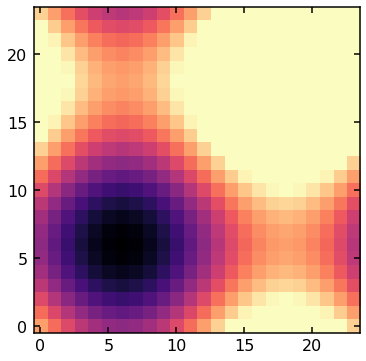

In [21]:
plt.imshow(delta[:, : , 10])

In [2]:
#Possible grid nbrs
L = 1
i = 4
N = np.array([i, 2*i, 4*i, 8*i])*4
dx = L/N
print(N)
for i in dx:
    print(i)

[ 16  32  64 128]
0.0625
0.03125
0.015625
0.0078125


In [6]:
1206/128

9.421875

In [1]:
a0 = 1
c = 1 # Mpc/s
h = 0.7
H0 = c*h/2997.9 # 1/s
print('H0 = {:.3e}'.format(H0))
t0 = 2/(3*H0) # s
print('t0 = ', t0)

H0 = c*h/2779.9
t0 = 2/(3*H0)

H0 = 2.335e-04
t0 =  2855.142857142858


In [2]:
def a(z):
    return a0/(1+z)
def t(z):
    return t0*(a(z)/a0)**(3/2)

def H(t):
    return 2/(3*t)
def z(t):
    return -1+(H(t)/H0)**(2/3)
    
print('z = {:.2f},    t = {:.2f},  a = {:.2f}'.format(0, t(0), a(0)))
print('z = {:.2f},  t = {:.2f},     a = {:.2e}'.format(z(1), 1, a(z(1))))
print('z = {:.2f},  t = {:.2e}, a = {:.2e}'.format(500, t(500), a(500)))
print('z = {:.2f}, t = {:.2e}, a = {:.2e}'.format(1000, t(1000), a(1000)))

z = 0.00,    t = 2855.14,  a = 1.00
z = 200.26,  t = 1.00,     a = 4.97e-03
z = 500.00,  t = 2.55e-01, a = 2.00e-03
z = 1000.00, t = 9.02e-02, a = 9.99e-04


In [6]:
np.shape(np.array(data))

(2, 5)

In [2]:
class Testing:
    def __init__(self):
        self.it = 0
    def addone(self):
        self.it += 1
T = Testing()
for i in range(10):
    T.addone()
print(T.it)

10


In [4]:
pflrw_A1e5_L10_N16, pflrw_A1e5_L10_N32, pflrw_A1e5_L10_N64
pflrw_A1e7_L10_N16, pflrw_A1e7_L10_N32, pflrw_A1e7_L10_N64

pflrw_A1e5_L1_N16, pflrw_A1e5_L1_N32, pflrw_A1e5_L1_N64
pflrw_A1e7_L1_N16, pflrw_A1e7_L1_N32, pflrw_A1e7_L1_N64
pflrw_A1e5_L1_N16_rho1st, pflrw_A1e5_L1_N32_rho1st, pflrw_A1e5_L1_N64_rho1st

pflrw_A1e5_L1_N16_z500, pflrw_A1e5_L1_N32_z500, pflrw_A1e5_L1_N64_z500
pflrw_A1e5_L1_N16_z500_rho1st, pflrw_A1e5_L1_N32_z500_rho1st, pflrw_A1e5_L1_N64_z500_rho1st

0.015625

/home/robynm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


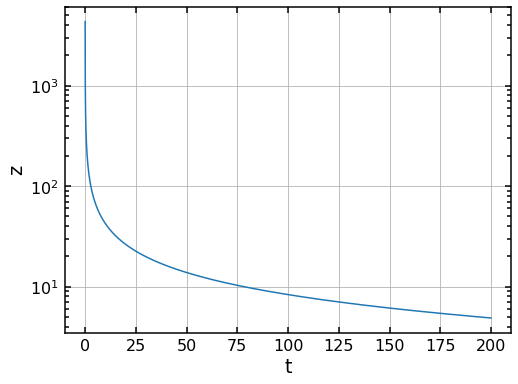

In [22]:
t = np.arange(0, 200, 0.01)
z = -1+(t/(2*H0m1/3))**(-2/3)
plt.semilogy(t, z)
plt.xlabel('t')
plt.ylabel('z')
plt.grid()

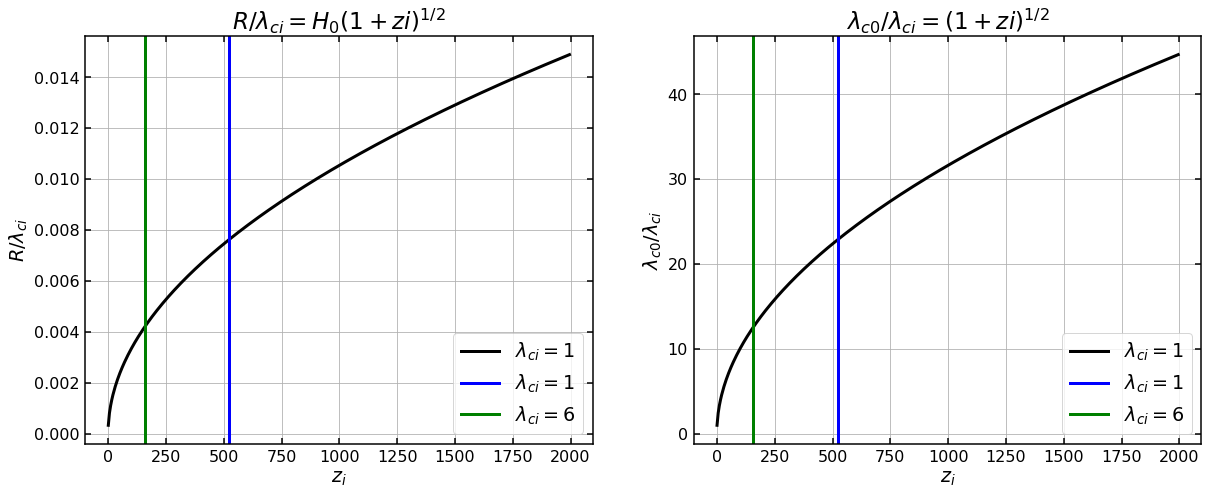

In [51]:
zi = np.arange(0, 2000, 5)
H0 = 1/3000
lambda_ci = np.array([1, 6])
colors = ['b', 'g']
ziBent = (4/(lambda_ci*H0))**(2/3)-1
lw=3

plt.figure(figsize=(20,7.5))
plt.subplot(121)
plt.plot(zi, H0*(1+zi)**(1/2), c='k', linewidth=lw, label=r'$\lambda_{ci}=1$')
for zibent, col, lambdaci in zip(ziBent, colors, lambda_ci):
    plt.axvline(x=zibent, c=col, linewidth=lw, label=r'$\lambda_{ci}=$'+str(lambdaci))
plt.ylabel(r'$R/\lambda_{ci}$')
plt.xlabel(r'$z_i$')
plt.legend()
plt.title(r'$R/\lambda_{ci}=H_0(1+zi)^{1/2}$')
plt.grid()

plt.subplot(122)
plt.plot(zi, (1+zi)**(1/2), c='k', linewidth=lw, label=r'$\lambda_{ci}=1$')
for zibent, col, lambdaci in zip(ziBent, colors, lambda_ci):
    plt.axvline(x=zibent, c=col, linewidth=lw, label=r'$\lambda_{ci}=$'+str(lambdaci))
plt.ylabel(r'$\lambda_{c0}/\lambda_{ci}$')
plt.xlabel(r'$z_i$')
plt.legend()
plt.title(r'$\lambda_{c0}/\lambda_{ci}=(1+zi)^{1/2}$')
plt.grid()

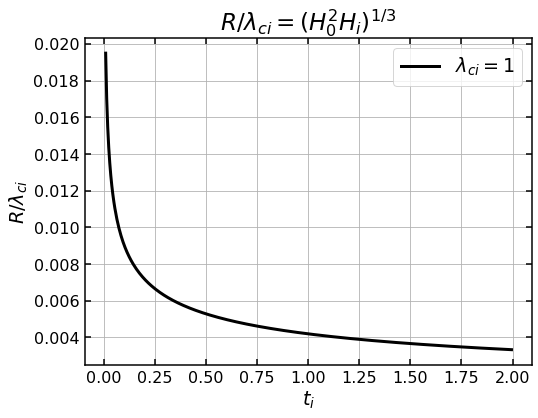

In [59]:
ti = np.arange(0.01, 2, 0.005)
H0 = 1/3000
Hi = 2/(3*ti)
lambda_ci = np.array([1, 6])
colors = ['b', 'g']
lw=3

plt.plot(ti, (H0*H0*Hi)**(1/3), c='k', linewidth=lw, label=r'$\lambda_{ci}=1$')
plt.ylabel(r'$R/\lambda_{ci}$')
plt.xlabel(r'$t_i$')
plt.legend()
plt.title(r'$R/\lambda_{ci}=(H_0^2 H_i)^{1/3}$')
plt.grid()

157.7401051968199 0.02519842099789747


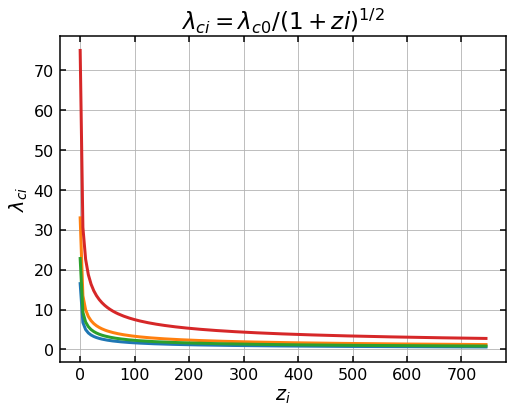

In [87]:
zi = (4/(6*H0))**(2/3)-1
R = 4/(1+zi)
print(zi, R)

zi = np.arange(0, 750, 5)
H0 = 1/3000
Lc0Bent = np.array([0.0076, 0.025])/H0
Lc0Virgo = np.array([16.5, 33])
Lc0 = np.append(Lc0Virgo, Lc0Bent)
lw=3

for lco in Lc0:
    plt.plot(zi, lco/(1+zi)**(1/2), linewidth=lw, label=r'$\lambda_{c0}=$'+str(lco))
plt.ylabel(r'$\lambda_{ci}$')
plt.xlabel(r'$z_i$')
plt.title(r'$\lambda_{ci}=\lambda_{c0}/(1+zi)^{1/2}$')
plt.grid()
#plt.ylim(0,7)

In [75]:
-1+Lc0**2

array([ 271.25, 1088.  ])

In [ ]:
L = 2
dx = 0.001
Lambda_pert = 
k_pert = 2*np.pi/Lambda_pert
x = np.arange(-L/2, L/2, dx)
y = np.sin(x*k_pert)

In [8]:
pool = Pool(processes=2)
def f(b):
    return b**2
b2 = np.array(pool.map(f,  [1, 2, 3]))

In [9]:
b2

array([1, 4, 9])

In [7]:
#Levi Civita



print(np.shape(edown))

N = 50
Rc = np.zeros([N, N, N])
Box1 = np.ones(np.shape(Rc))

print(np.shape(edown*Box1))

(3, 3, 3, 50, 50, 50)
(3, 3, 3, 50, 50, 50)


In [2]:
import h5py
file = '/home/robynm/simulations/S1/dust_k1_0.6/dust_k1_0.6_it_000000.hdf5'
f = h5py.File(file,'r')
f.keys()

<KeysViewHDF5 ['ADMBASE::alp it=0 tl=0 rl=2', 'ADMBASE::betax it=0 tl=0 rl=2', 'ADMBASE::betay it=0 tl=0 rl=2', 'ADMBASE::betaz it=0 tl=0 rl=2', 'ADMBASE::gxx it=0 tl=0 rl=2', 'ADMBASE::gxy it=0 tl=0 rl=2', 'ADMBASE::gxz it=0 tl=0 rl=2', 'ADMBASE::gyy it=0 tl=0 rl=2', 'ADMBASE::gyz it=0 tl=0 rl=2', 'ADMBASE::gzz it=0 tl=0 rl=2', 'ADMBASE::kxx it=0 tl=0 rl=2', 'ADMBASE::kxy it=0 tl=0 rl=2', 'ADMBASE::kxz it=0 tl=0 rl=2', 'ADMBASE::kyy it=0 tl=0 rl=2', 'ADMBASE::kyz it=0 tl=0 rl=2', 'ADMBASE::kzz it=0 tl=0 rl=2', 'CT_DUST::rho it=0 tl=0 rl=2']>

In [33]:
torh5 = True
if type(torh5)==int or type(torh5)==float:
    print(torh5)
elif type(torh5)==bool:
    print(torh5)
print(type(torh5))

True
<class 'bool'>


In [25]:
L = 1
dx = np.array([0.01, 0.02, 0.04])
L/dx

array([100.,  50.,  25.])

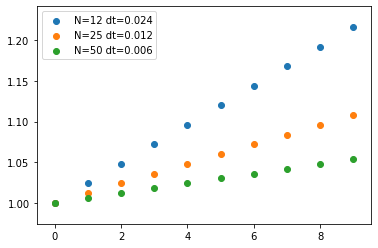

In [12]:
import numpy as np
import matplotlib.pyplot as plt
ti = 1
dtfac=0.3
rfmax = 0
L = 1

def t(dx):
    dx_ref = dx/(2**rfmax)
    it = np.arange(10)
    t = ti + it*dx_ref*dtfac
    N = int(L/dx)
    plt.scatter(it, t, label='N='+str(N)+' dt='+str(dx_ref*dtfac))
    
t(0.08)
t(0.04)
t(0.02)
plt.legend()

In [1]:
A = [56, 20, 43, 12]
for a in A:
    b = str(a)
    print(b, end=" ")

56 20 43 12 

In [40]:
import test
from data_analysis_codes import param
import inspect

classest = [m[0] for m in inspect.getmembers(test, inspect.isclass) if m[1].__module__ == 'test']
classesp = [m[0] for m in inspect.getmembers(param, inspect.isclass) if m[1].__module__ == 'param']

In [41]:
classest, classesp

([], [])

In [1]:
import test
method_to_call = getattr(test, 'ClassB')

In [2]:
T = method_to_call()

In [4]:
T.Aa

50

In [5]:
import inspect
classest = [m[0] for m in inspect.getmembers(test, inspect.isclass) if m[1].__module__ == 'test']

In [6]:
classest

['ClassA', 'ClassB']

In [25]:
import test

class ClassA():
    def __init__(self):
        self.Aa = 1
        self.Ab = 2
        
class ClassB():
    def __init__(self):
        self.Ba = 3
        self.Bb = 4
        self.Ta = test.Ta
        self.Tb = test.Tb
        
t = ClassB()
print(t.Ta)
#>> 1

1


In [26]:
len(test)

TypeError: object of type 'module' has no len()

In [19]:

import inspect

In [22]:
inspect.getmembers(test)

[('Ta', 1),
 ('Tb', 2),
 ('__builtins__',
  {'__name__': 'builtins',
   '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in slices.",
   '__package__': '',
   '__loader__': _frozen_importlib.BuiltinImporter,
   '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>),
   '__build_class__': <function __build_class__>,
   '__import__': <function __import__>,
   'abs': <function abs(x, /)>,
   'all': <function all(iterable, /)>,
   'any': <function any(iterable, /)>,
   'ascii': <function ascii(obj, /)>,
   'bin': <function bin(number, /)>,
   'breakpoint': <function breakpoint>,
   'callable': <function callable(obj, /)>,
   'chr': <function chr(i, /)>,
   'compile': <function compile(source, filename, mode, flags=0, dont_inherit=False, optimize=-1)>,
   'delattr': <function delattr(obj, name, /)>,
   'dir': <function dir>,
   'divmod': <function divmod(x, y, /)>,
   'eval'

In [2]:
a = [1, 2, 3]
b = [4, 3, 2]

for i in a:
    for j in b:
        if i==j:
            break
        print(i, j)
    print()

1 4
1 3
1 2

2 4
2 3

3 4



In [1]:
logic = [False, True, True]
a, b, c = logic
print(a, b, c)

False True True


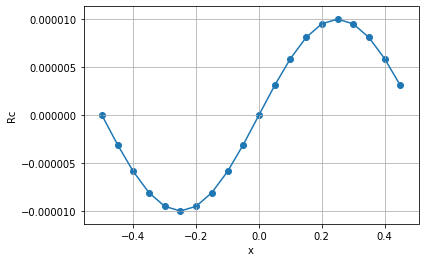

In [5]:
import numpy as np
import matplotlib.pyplot as plt

R = 2/3
ti = 1
Amp_pert = 1e-5
L = 1
dx = 0.05

Hiprop = 2 / ( 3 * ti )
lambda_pert = R / Hiprop
k_pert = 2 * np.pi / lambda_pert

x = np.arange(-L/2, L/2, dx)
Rc = Amp_pert * np.sin( x * k_pert)

plt.plot(x, Rc)
plt.scatter(x, Rc)
plt.ylabel('Rc')
plt.xlabel('x')
plt.grid()

[-1.  0.]
2.0 2
3.0
[-2.25  0.75]


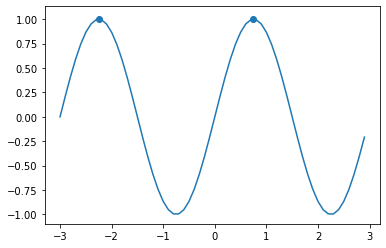

In [15]:
import numpy as np
from codes import param
p = param.dust_k2_04()

nbr_in_box = 

n = np.arange(np.ceil(-p.L/(2*p.lambdai)-1/4), np.ceil(p.L/(2*p.lambdai)-1/4), 1)
xOD_cent = p.lambdai/4            # 'physical' location of overdensity clossest to center
xOD_all = xOD_cent+p.lambdai*n    # shift to get all the other locations

print(n)
P = 2*np.pi/p.ki
print(p.L/P, p.nbrModes)

lamb =p.L/ p.nbrModes
#'physical' location of overdensity

print(xOD_all)
x= np.arange(-p.L/2, p.L/2, p.dx_ref)
y = np.sin(p.ki*x)
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.scatter(xOD_loc, np.ones(len(xOD_loc)))

In [28]:
import numpy as np
gu = np.array([['gxxu', 'gxyu', 'gxzu'], ['gxyu', 'gyyu', 'gyzu'], ['gxzu', 'gyzu', 'gzzu']])
K = np.array([['kxx', 'kxy', 'kxz'], ['kxy', 'kyy', 'kyz'], ['kxz', 'kyz', 'kzz']])
ijk = '(i,j,k)'
print(r'$K^{i}_{j}K^{j}_{i}$')
for i in range(3):
    for k in range(3):
        print('                       + '+gu[i,k]+' * ( ')
        for j in range(3):
            print('                                + '+K[k,j]+ijk+' * (', end = '')
            for l in range(3):
                print(' + '+gu[j,l]+'*'+K[l,i]+ijk, end = '')
            print(' ) & ')
        print(' ) &')
                
print()
print()
print(r'$K$')
for i in range(3):
    for j in range(3):
        print(' + '+gu[i,j]+' * '+K[i,j]+ijk, end = '')

$K^{i}_{j}K^{j}_{i}$
                       + gxxu * ( 
                                + kxx(i,j,k) * ( + gxxu*kxx(i,j,k) + gxyu*kxy(i,j,k) + gxzu*kxz(i,j,k) ) & 
                                + kxy(i,j,k) * ( + gxyu*kxx(i,j,k) + gyyu*kxy(i,j,k) + gyzu*kxz(i,j,k) ) & 
                                + kxz(i,j,k) * ( + gxzu*kxx(i,j,k) + gyzu*kxy(i,j,k) + gzzu*kxz(i,j,k) ) & 
 ) &
                       + gxyu * ( 
                                + kxy(i,j,k) * ( + gxxu*kxx(i,j,k) + gxyu*kxy(i,j,k) + gxzu*kxz(i,j,k) ) & 
                                + kyy(i,j,k) * ( + gxyu*kxx(i,j,k) + gyyu*kxy(i,j,k) + gyzu*kxz(i,j,k) ) & 
                                + kyz(i,j,k) * ( + gxzu*kxx(i,j,k) + gyzu*kxy(i,j,k) + gzzu*kxz(i,j,k) ) & 
 ) &
                       + gxzu * ( 
                                + kxz(i,j,k) * ( + gxxu*kxx(i,j,k) + gxyu*kxy(i,j,k) + gxzu*kxz(i,j,k) ) & 
                                + kyz(i,j,k) * ( + gxyu*kxx(i,j,k) + gyyu*kxy(i,j,k) + gyzu*kxz(i,j,k) ) & 


In [12]:
L = 8.0
H0i = 3000.0
zi = 3000.0
Hi = (1.0+zi)**(3.0/2.0) / H0i
print(Hi)
LH = L * Hi 
print(LH)

LH = 4.0
L = LH / Hi
print(L)

54.799644160442426
438.3971532835394
0.07299317470545608


In [2]:
3/2

1.5

In [14]:
ti = 2.0 * H0i / (3.0 * (1.0+zi)**(3/2))
print(ti)
Hi = 2/(3*ti)
print(Hi)

0.012165529117576014
54.79964416044242


In [21]:
H0 = 1/3000
t0 = 2/(3*H0)
print(t0)
zi = 3000
ti = t0 / (1+zi)**(3/2)
print(ti)

2000.0
0.012165529117576014


In [49]:
H0 = 1/3000
zi = 3000
Hi = H0*((1+zi)**(3/2))
print(Hi)
ti = 2/(3*Hi)
print(ti)

t01 = 2/(3*H0)
t02 = ti*((1+zi)**(3/2))
print(t01, t02)

54.79964416044242
0.012165529117576014
2000.0 2000.0


In [50]:
R = 4
L = R / (H0*np.sqrt(1+zi))
print(L)

L = 8
R = L*(H0*np.sqrt(1+zi))
print(R)

219.0525172910737
0.14608368986455827


(0.6605450308433453, 6054.091414319337)

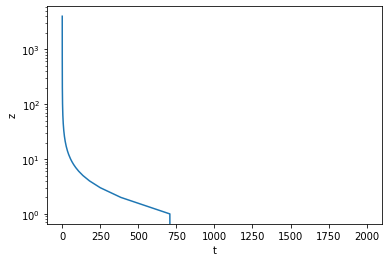

In [43]:
import matplotlib.pyplot as plt
H0i = 3000
t0 = (2/3)*H0i
z = np.arange(0, 4000, 1)
t = t0/(1+z)**(3/2)
plt.semilogy(t, z)
plt.xlabel('t')
plt.ylabel('z')
plt.ylim()

In [40]:
z

array([   0,    1,    2, ..., 3997, 3998, 3999])

In [6]:
try: 
    my_list = [] 
      
    while True: 
        my_list.append(int(input('Give a')))
# if input is not-integer, just print the list 
except: 
    print(my_list) 

Give a1
Give a2
Give a5
Give adone
[1, 2, 5]


In [12]:
L = 6
dx = 0.4
dx_ref = dx/(2**2)
N = 58
N*dx_ref/(2*L)

0.4833333333333334

In [93]:
def FFD(n,f,ix):
    return np.sum([((-1)**i)*scipy.special.comb(n, i, exact=True)*f[ix+(n-i)] for i in range(n+1)])
def FFD4(f,ix,dx):
    return FFD(1,f,ix)/dx-FFD(2,f,ix)*dx/2-FFD(3,f,ix)*(dx**2)/6-FFD(4,f,ix)*(dx**3)/24

def BFD(n,f,ix):
    return np.sum([((-1)**i)*scipy.special.comb(n, i, exact=True)*f[ix-i] for i in range(n+1)])
def BFD4(f,ix,dx):
    return BFD(1,y,ix)/dx+BFD(2,y,ix)*dx/2-BFD(3,y,ix)*(dx**2)/6+BFD(4,y,ix)*(dx**3)/24

100 96 92 96 100


(-1, 0)

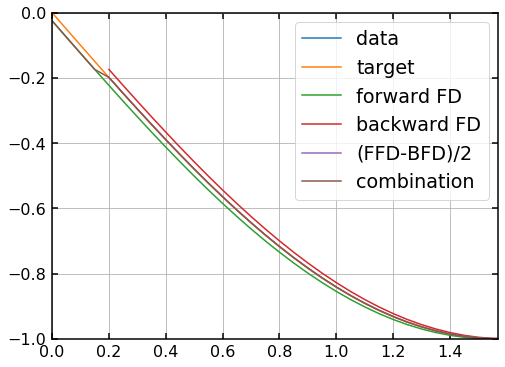

In [108]:
dx = 0.05
x = np.arange(0, 5, dx)
y = np.cos(x)
yp = -np.sin(x)

sF4 = np.array([FFD4(y,ix,dx) for ix in range(len(x)-4)])
sB4 = np.array([BFD4(y,ix,dx) for ix in range(4,len(x))])
sM4 = (sF4[4:]+sB4[:-4])/2

sf = np.append(np.append(sF4[:4], sM4), sB4[-4:])
print(len(x), len(sF4),len(sM4),len(sB4),len(sf))

plt.plot(x,y,label='data')
plt.plot(x,yp,label='target')
plt.plot(x[:-4], sF4,label='forward FD')
plt.plot(x[4:], sB4,label='backward FD')
plt.plot(x[4:-4], sM4,label='(FFD-BFD)/2')
plt.plot(x, sf,label='combination')
plt.grid()
plt.legend()

plt.xlim(0,np.pi/2)
plt.ylim(-1,0)

Text(0, 0.5, '$|1-a/\\bar{a}|$')

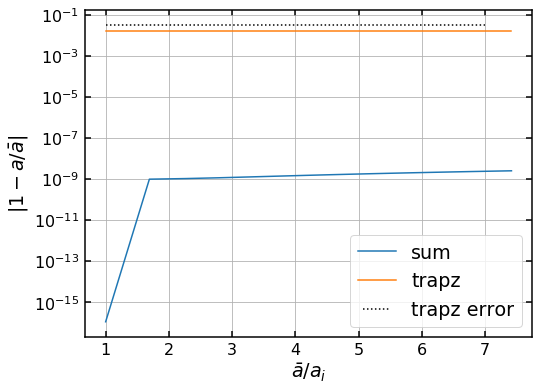

In [89]:
def weight3d(N):
    w3d = np.ones([N, N, N])
    ib = [0, -1]
    #Bounding surface
    for i in ib:
        w3d[i, :, :] = 1/2
        w3d[:, i, :] = 1/2
        w3d[:, :, i] = 1/2

    #Edges
    for i in ib:
        for j in ib:
            w3d[i, j, :] = 1/4
            w3d[i, :, j] = 1/4
            w3d[:, i, j] = 1/4

    #Corners
    for i in ib:
        for j in ib:
            for k in ib:
                w3d[i, j, k] = 1/8
    return w3d

def trap3d(phi, dx):
    w = weight3d(np.shape(phi)[0])
    return np.sum(w*phi)*(dx**3)

def a_bar(p, h5):
    return p.ai*(t(p, h5)/p.ti)**(2/3)
    
def t(p, h5):
    dt = p.dx*p.dtfac/(2**p.rfmax)
    t = np.arange(p.ti, p.t_final+dt, dt)
    if h5:
        return t[0::p.h5_every]
    else:
        return t
    
    
for p in [param.flrw04()]:
    it_file_name = p.H_path+p.dr
    dx_ref = p.dx/(2**p.rfmax)

    it_all = np.arange(0, 17, 1)*p.h5_every
    int_it_all = [int(i) for i in it_all]

    a_D = []
    a_D_trapz = []
    a_D_mytrapz = []

    for it in it_all:
        f = h5py.File('{}_it_{:06d}.hdf5'.format(it_file_name, it), 'r')
        gij_keys = ['ADMBASE::{} it={} tl=0 rl={}'.format(gij, it, p.rfmax) for gij in 
                          ['gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz']]
        gxx, gxy, gxz, gyy, gyz, gzz, gdown = read_xyz(f, gij_keys)
        f.close()
        g_det = -gxz*gxz*gyy + 2*gxy*gxz*gyz - gxx*gyz*gyz - gxy*gxy*gzz + gxx*gyy*gzz
        
        phi = np.sqrt(g_det)

        V = np.sum(phi)*dx_ref**3
        a_D += [V**(1/3)]
        a_D_mytrapz += [trap3d(phi, dx_ref)**(1/3)]

    ab = a_bar(p, h5=True)
    plt.semilogy(ab[:len(a_D)]/p.ai, abs(1-a_D/ab[:len(a_D)]), label='sum')
    plt.semilogy(ab[:len(a_D_mytrapz)]/p.ai, abs(1-a_D_mytrapz/ab[:len(a_D_mytrapz)]), label='trapz')
    plt.hlines(y = 3*dx_ref**2, xmin=1, xmax=7, linestyle=':', label='trapz error')
plt.grid()
plt.legend()
plt.xlabel(r'$\bar{a}/a_i$')
plt.ylabel(r'$|1-a/\bar{a}|$')

In [59]:
def weight2d(N):
    ib = [0, -1]
    w2d = np.ones([N, N])
    #Edges
    for i in ib:
        w2d[i, :] = 1/2
        w2d[:, i] = 1/2
    #Corners
    for i in ib:
        for j in ib:
            w2d[i, j] = 1/4
    return w2d
def weight3d(N):
    w3d = np.ones([N, N, N])
    ib = [0, -1]
    #Bounding surface
    for i in ib:
        w3d[i, :, :] = 1/2
        w3d[:, i, :] = 1/2
        w3d[:, :, i] = 1/2

    #Edges
    for i in ib:
        for j in ib:
            w3d[i, j, :] = 1/4
            w3d[i, :, j] = 1/4
            w3d[:, i, j] = 1/4

    #Corners
    for i in ib:
        for j in ib:
            for k in ib:
                w3d[i, j, k] = 1/8
    return w3d

def trap1d(phi, dx):
    return (2*np.sum(phi)-phi[0]-phi[-1])*dx/2

def trap2d(phi, dx):
    w = weight2d(np.shape(phi)[0])
    return np.sum(w*phi)*(dx**2)

def trap3d(phi, dx):
    w = weight3d(np.shape(phi)[0])
    return np.sum(w*phi)*(dx**3)

N = 100

print('1D')
x = np.abs(np.random.randn(N))
print(trap1d(x, 1))
print(np.trapz(x, dx=1))

print('2D')
x = np.abs(np.random.randn(N, N))
print(trap2d(x, 1))
print(np.trapz(np.trapz(x, dx=1), dx=1))

print('3D')
x = np.abs(np.random.randn(N, N, N))
print(trap3d(x, 1))
print(np.trapz(np.trapz(np.trapz(x, dx=1), dx=1), dx=1))

1D
82.84245904935231
82.8424590493523
2D
7762.354303505025
7762.354303505026
3D
774974.5305379685
774974.5305379684


In [53]:
ib = [0, -1]
N = 5



[[0.25 0.5  0.5  0.5  0.5 ]
 [0.5  1.   1.   1.   0.5 ]
 [0.5  1.   1.   1.   0.5 ]
 [0.5  1.   1.   1.   0.5 ]
 [0.25 0.5  0.5  0.5  0.25]]

[[0.125 0.25  0.25  0.25  0.125]
 [0.25  0.5   0.5   0.5   0.25 ]
 [0.25  0.5   0.5   0.5   0.25 ]
 [0.25  0.5   0.5   0.5   0.25 ]
 [0.125 0.25  0.25  0.25  0.125]]
[[0.25 0.5  0.5  0.5  0.25]
 [0.5  1.   1.   1.   0.5 ]
 [0.5  1.   1.   1.   0.5 ]
 [0.5  1.   1.   1.   0.5 ]
 [0.25 0.5  0.5  0.5  0.25]]
[[0.25 0.5  0.5  0.5  0.25]
 [0.5  1.   1.   1.   0.5 ]
 [0.5  1.   1.   1.   0.5 ]
 [0.5  1.   1.   1.   0.5 ]
 [0.25 0.5  0.5  0.5  0.25]]
[[0.25 0.5  0.5  0.5  0.25]
 [0.5  1.   1.   1.   0.5 ]
 [0.5  1.   1.   1.   0.5 ]
 [0.5  1.   1.   1.   0.5 ]
 [0.25 0.5  0.5  0.5  0.25]]
[[0.125 0.25  0.25  0.25  0.125]
 [0.25  0.5   0.5   0.5   0.25 ]
 [0.25  0.5   0.5   0.5   0.25 ]
 [0.25  0.5   0.5   0.5   0.25 ]
 [0.125 0.25  0.25  0.25  0.125]]


<KeysViewHDF5 ['ADMBASE::alp it=960 tl=0 rl=2', 'ADMBASE::betax it=960 tl=0 rl=2', 'ADMBASE::betay it=960 tl=0 rl=2', 'ADMBASE::betaz it=960 tl=0 rl=2', 'ADMBASE::gxx it=960 tl=0 rl=2', 'ADMBASE::gxy it=960 tl=0 rl=2', 'ADMBASE::gxz it=960 tl=0 rl=2', 'ADMBASE::gyy it=960 tl=0 rl=2', 'ADMBASE::gyz it=960 tl=0 rl=2', 'ADMBASE::gzz it=960 tl=0 rl=2', 'ADMBASE::kxx it=960 tl=0 rl=2', 'ADMBASE::kxy it=960 tl=0 rl=2', 'ADMBASE::kxz it=960 tl=0 rl=2', 'ADMBASE::kyy it=960 tl=0 rl=2', 'ADMBASE::kyz it=960 tl=0 rl=2', 'ADMBASE::kzz it=960 tl=0 rl=2', 'CT_DUST::rho it=960 tl=0 rl=2']>


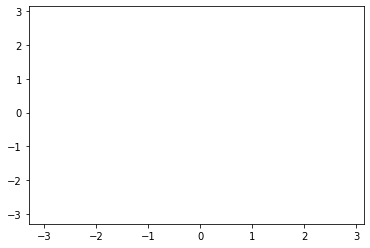

In [81]:
it_file_name = p.H_path+p.dr
dx_ref = p.dx/(2**p.rfmax)
nbrG = 3
it_all = np.arange(0, 17, 1)*p.h5_every
int_it_all = [int(i) for i in it_all]
it = int_it_all[-1]
zloc = 0
f = h5py.File('{}_it_{:06d}.hdf5'.format(it_file_name, it), 'r')
print(f.keys())


Bx = np.array(f['ADMBASE::betax it={} tl=0 rl=2'.format(it)])[nbrG:-nbrG, nbrG:-nbrG, nbrG:-nbrG]
By = np.array(f['ADMBASE::betay it={} tl=0 rl=2'.format(it)])[nbrG:-nbrG, nbrG:-nbrG, nbrG:-nbrG]
Bz = np.array(f['ADMBASE::betaz it={} tl=0 rl=2'.format(it)])[nbrG:-nbrG, nbrG:-nbrG, nbrG:-nbrG]
Bnorm = np.sqrt(Bx**2+By**2+Bz**2)
f.close()

xx = np.arange(-p.L/2, p.L/2, dx_ref)
X, Y = np.meshgrid(xx, xx)
plt.quiver(X, Y, U, V)

In [89]:
p.L/dx_ref

40.0

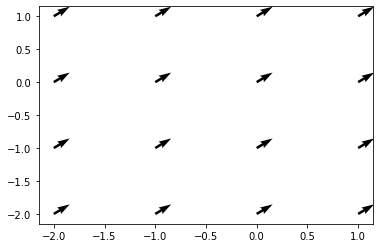

In [72]:
xx = np.arange(-2, 2, 1)
X, Y = np.meshgrid(xx, xx)

N = len(xx)
U = np.ones([N, N])
V = np.ones([N, N])*0.6

plt.quiver(X, Y, U, V)

Dim  60 ^3
k0 =  1
Dim  60 ^3
k0 =  1


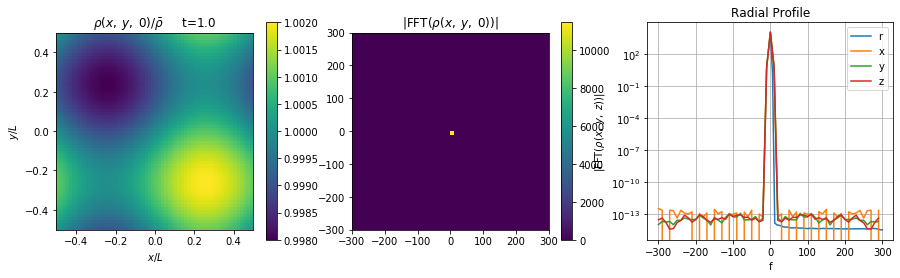

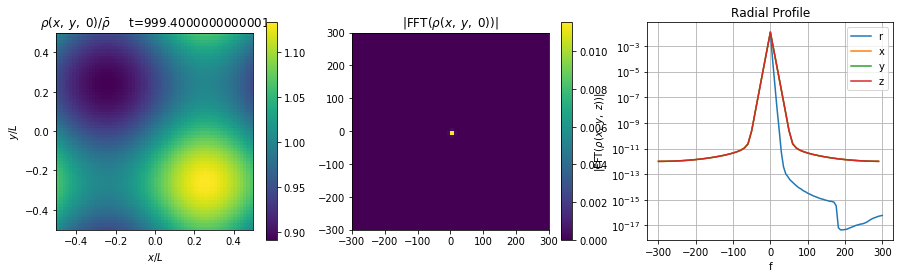

In [5]:
def radial_profile(data, center):
    y, x, z = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2 + (z - center[2])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile 

p = param.dust_k1_04()
dx_ref = p.dx/(2**p.rfmax)
it_file_name = p.H_path+p.dr

itall = [0, p.it_last]
for it in itall:
    
    #Data
    f = h5py.File('{}_it_{:06d}.hdf5'.format(it_file_name, it), 'r')
    rho = np.array(f['CT_DUST::rho it={} tl=0 rl={}'.format(it, p.rfmax)])[p.nbrG:-p.nbrG, p.nbrG:-p.nbrG, p.nbrG:-p.nbrG]
    N = np.shape(rho)[0]
    print('Dim ', N, '^3')
    print('k0 = ', p.nbrModes)
    f.close()
    t = p.ti + it*dx_ref*p.dtfac
    rho_back = (3*(2/(3*t))**2)/(8*np.pi)
    
    #FFT and Rad profile
    fftrho = np.fft.fftshift(np.fft.fftn(rho))
    center = int(N/2)
    radfftrho = radial_profile(np.abs(fftrho), (center, center, center))
    
    #Domain ranges
    xmax= 0.5  #x/L
    
    dxf = 1/dx_ref
    fmax = dxf*N/2
    f = np.arange(-fmax, fmax, dxf)
    fr = np.linspace(0, fmax, len(radfftrho))
    

    plt.figure(figsize=(15, 4))
    plt.subplot(131)
    plt.imshow(rho[:,:,center]/rho_back, extent=[-xmax, xmax, -xmax, xmax])
    plt.colorbar()
    plt.title(r'$\rho(x,\;y,\;0)/\bar{\rho}$'+'     t={}'.format(t))
    plt.xlabel(r'$x/L$')
    plt.ylabel(r'$y/L$')
    
    plt.subplot(132)
    plt.imshow(np.abs(fftrho[:,:,center]), extent=[-fmax, fmax, -fmax, fmax])
    plt.colorbar()
    plt.title(r'|FFT($\rho(x,\;y,\;0)$)|')
    
    plt.subplot(133)
    plt.semilogy(fr, radfftrho, label='r')
    #plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.semilogy(f, np.abs(fftrho[:,center,center]), label='x')
    plt.semilogy(f, np.abs(fftrho[center,:,center]), label='y')
    plt.semilogy(f, np.abs(fftrho[center,center,:]), label='z')
    plt.grid()
    plt.xlabel('f')
    plt.ylabel(r'|FFT($\rho(x,\;y,\;z)$)|')
    plt.title('Radial Profile')
    plt.legend()
    

In [7]:
def plotscat(a, b):
    x, y, z = np.meshgrid(f, f, f)
    fig = plt.figure(figsize=(15,10)) 
    ax = plt.axes(projection='3d')
    ct = np.ravel(np.abs(fftrho))
    ct = ct/max(ct)*5e3
    ax.scatter(x, y, z, s=ct, c=ct, alpha=0.5, norm = colors.LogNorm(), cmap=plt.cm.get_cmap('Blues'), linewidth=0.5);
    bs = 15
    ax.set_xlim(-bs,bs)
    ax.set_ylim(-bs,bs)
    ax.set_zlim(-bs,bs)
    ax.view_init(a, b)
    
interact(plotscat, a=(-90,90,5), b=(-180,0,5))

interactive(children=(IntSlider(value=0, description='a', max=90, min=-90, step=5), IntSlider(value=-90, descr…

<function __main__.plotscat(a, b)>

In [47]:
%matplotlib
f = [-3, -2, -1, 0, 1, 2, 3]
x, y, z = np.meshgrid(f, f, f)
ax = plt.axes(projection='3d')
ax.scatter(x, y, z)

Using matplotlib backend: Qt5Agg


[3. 1. 0. 0. 0. 0.]


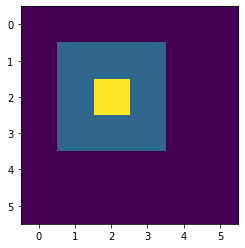

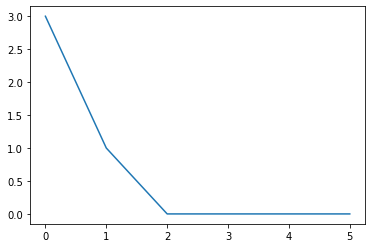

In [72]:

def radial_profile(data, center):
    y, x, z = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2 + (z - center[2])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile 

b = np.zeros([6, 6, 6])
b[1:4, 1:4, 1:4] = 1
b[2, 2, 2] += 2
plt.imshow(b[:, :, 2])

radb = radial_profile(b, (2, 2, 2))
print(radb)
plt.figure()
plt.plot(radb)

/home/robynm/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


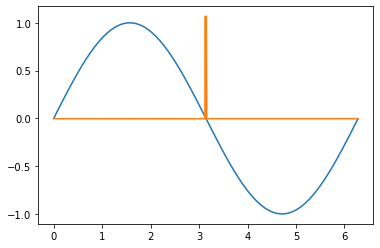

In [28]:
x = np.arange(0, 2*np.pi, 0.01)
k0 = 1
y = np.sin(k0*x)
plt.plot(x, y)

k = np.arange()
ffty = np.fft.fftshift(np.fft.fftn(y))
plt.plot(x, ffty)

0.0
1.0471975511965976
2.0943951023931953
4.1887902047863905


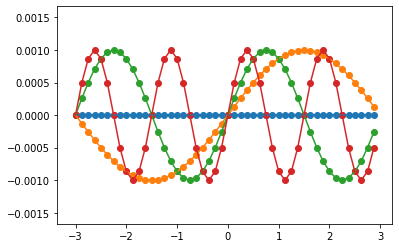

In [3]:
dx = 0.5
rfmax = 2
x = np.arange(-3, 3, dx/(2**rfmax))
L = 6
for i in [0, 1,2,4]:
    k = i*(2*np.pi)/L
    print(k)
    rho = 1e-3*np.sin(k*x)
    plt.plot(x, rho)
    plt.scatter(x, rho)

In [17]:
rho1 = 1e-3*np.sin(1*(2*np.pi)/L*x)
rho2 = 1e-3*np.sin(2*(2*np.pi)/L*x)
rho3 = 1e-3*np.sin(3*(2*np.pi)/L*x)

OD_loc1 = np.where(rho1 == rho1.max())
OD_loc2 = np.where(rho2 == rho2.max())
OD_loc3 = np.where(rho3 == rho3.max())

print(OD_loc1, rho1[OD_loc1])
print(OD_loc2, rho2[OD_loc2])
print(OD_loc3, rho3[OD_loc3])

(array([36]),) [0.001]
(array([ 6, 30]),) [0.001 0.001]
(array([12, 28, 44]),) [0.001 0.001 0.001]


In [19]:
data = 1, rho3[OD_loc3], 6, 7
final_file = pd.DataFrame(columns='1,rhoOD,6,7'.split(','))
final_file.loc[0] = data
final_file.to_csv('test.csv', index=False)

In [23]:
0.5*0.2/(2**2)*60

1.5

Overdensity [2.98356569 2.98356569 2.98356569 2.98356569 2.98356569 2.98356569
 2.98356569 2.98356569 2.98356569 2.98356569 2.98356569 2.98356569
 2.98356569 2.98356569 2.98356569 2.98356569 2.98356569 2.98356569
 2.98356569 2.98356569 2.98356569 2.98356569 2.98356569 2.98356569
 2.98356569 2.98356569 2.98356569 2.98356569 2.98356569 2.98356569
 2.98356569 2.98356569 2.98356569 2.98356569 2.98356569 2.98356569
 2.98356569 2.98356569 2.98356569 2.98356569 2.98356569 2.98356569
 2.98356569 2.98356569 2.98356569 2.98356569 2.98356569 2.98356569
 2.98356569 2.98356569 2.98356569 2.98356569 2.98356569 2.98356569
 2.98356569 2.98356569 2.98356569 2.98356569 2.98356569 2.98356569
 2.98356569 2.98356569 2.98356569 2.98356569] 64
Underdensity [-2.98356569 -2.98356569 -2.98356569 -2.98356569 -2.98356569 -2.98356569
 -2.98356569 -2.98356569 -2.98356569 -2.98356569 -2.98356569 -2.98356569
 -2.98356569 -2.98356569 -2.98356569 -2.98356569 -2.98356569 -2.98356569
 -2.98356569 -2.98356569 -2.98356569 

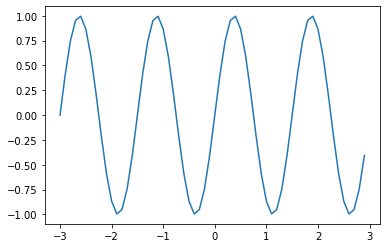

In [162]:



p = param.dust_k4_04()
locfinder = ODUDlocClass(p)

xx = locfinder.x
[x, y, z] = np.meshgrid(xx, xx, xx)
A = 1
rho =  A*np.sin(p.ki*x)+ A*np.sin(p.ki*y) + A*np.sin(p.ki*z)

plt.plot(xx, rho[:, 0, 0])

ODloc = locfinder.findOD()
UDloc = locfinder.findUD()

print('Overdensity', rho[iODloc], len(rho[iODloc]))
print('Underdensity', rho[iUDloc], len(rho[iUDloc]))

In [125]:
#iloc = 
ix, iy, iz = np.stack(np.meshgrid(ixOD_loc, ixOD_loc, ixOD_loc), -1).reshape(-1, 3).T
rho[ix, iy, iz]

array([1.0029966 , 1.00299761, 1.00299761, 1.00299862, 1.00299761,
       1.00299862, 1.00299862, 1.00299962])

([1], [1], [1])
([1, 1, 1, 1, 2, 2, 2, 2], [1, 1, 2, 2, 1, 1, 2, 2], [1, 1, 2, 2, 1, 1, 2, 2])
([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3], [1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3], [1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3])


In [129]:
iloc = np.stack(np.meshgrid(ixOD_loc, ixOD_loc, ixOD_loc)).reshape(-1, 3).T
rho[ix, iy, iz]

array([[[[1.00099887, 1.00112546, 1.00125002, ..., 1.00074772,
          1.00087227, 1.00099887],
         [1.00112546, 1.00125205, 1.00137661, ..., 1.00087431,
          1.00099887, 1.00112546],
         [1.00125002, 1.00137661, 1.00150116, ..., 1.00099887,
          1.00112342, 1.00125002],
         ...,
         [1.00074772, 1.00087431, 1.00099887, ..., 1.00049657,
          1.00062113, 1.00074772],
         [1.00087227, 1.00099887, 1.00112342, ..., 1.00062113,
          1.00074568, 1.00087227],
         [1.00099887, 1.00112546, 1.00125002, ..., 1.00074772,
          1.00087227, 1.00099887]],

        [[1.00099987, 1.00112647, 1.00125102, ..., 1.00074873,
          1.00087328, 1.00099987],
         [1.00112647, 1.00125306, 1.00137761, ..., 1.00087532,
          1.00099987, 1.00112647],
         [1.00125102, 1.00137761, 1.00150217, ..., 1.00099987,
          1.00112443, 1.00125102],
         ...,
         [1.00074873, 1.00087532, 1.00099987, ..., 1.00049758,
          1.00062213, 1.0

--- 0.15 40.0 40
--- 0.18749999999999586 32.0000000000007 32
--- 0.1999999999999945 30.000000000000828 30
--- 0.23999999999999008 25.000000000001034 25
--- 0.24999999999998898 24.00000000000106 24
--- 0.2999999999999835 20.0000000000011 20
--- 0.37499999999997524 16.000000000001055 16
--- 0.3999999999999725 15.000000000001032 15
--- 0.4999999999999615 12.000000000000925 12
--- 0.5999999999999505 10.000000000000826 10
--- 0.7499999999999339 8.000000000000705 8
--- 0.9999999999999064 6.000000000000561 6
--- 1.1999999999998843 5.000000000000482 5


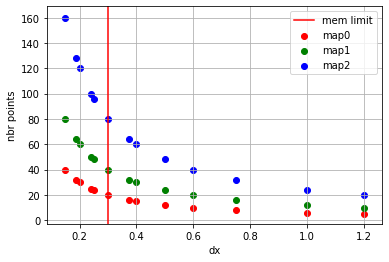

In [48]:
dx = np.arange(0.15, 1.45, 0.0001)
map0lx = []
map1lx = []
map2lx = []
dxf = []
L = 6
for i in dx:
    arrmap0 = np.arange(-3, 3.01, i)
    arrmap1 = np.arange(-3, 3.01, i/2)
    arrmap2 = np.arange(-3, 3.01, i/4)
    if np.round(L/i-int(L/i), decimals=5) == 0: #np.round(arrmap0[-1], decimals=5)==3: #
        print('---', i, L/i, int(L/i))
        dxf += [i]
        """map0lx += [len(arrmap0)]
        map1lx += [len(arrmap1)]
        map2lx += [len(arrmap2)]"""
        map0lx += [L/i]
        map1lx += [L/(i/2)]
        map2lx += [L/(i/4)]
#dxf = np.array(dxf)
mapi = 1#[1, 2, 4]
plt.scatter(dxf, map0lx, color='r', label='map0')
plt.scatter(dxf, map1lx, color='g', label='map1')
plt.scatter(dxf, map2lx, color='b', label='map2')

plt.axvline(x = 0.3, color='r', label='mem limit')

plt.ylabel('nbr points')
plt.xlabel('dx')
plt.legend()
plt.grid()
#plt.ylim(0, 100)
#plt.xlim(0.2, 1.1)

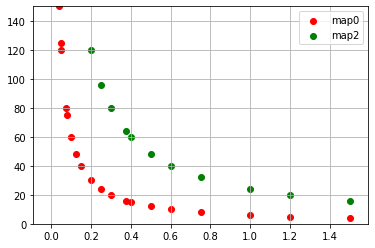

In [99]:
dx = np.arange(0.001, 2, 0.001)
L = 6
N = L/dx
mask = [n.is_integer() for n in N]
dx = np.array(dx[mask])
N = np.array(N[mask])
N2 = 4*N
plt.scatter(dx, N, color='r', label='map0')
plt.scatter(dx, N2, color='g', label='map2')
plt.ylim(0, 150)
plt.grid()
plt.legend()

In [100]:
abs(np.array(lx)-25)

array([2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3])

(6, 6, 6)
(12, 12, 12)
(24, 24, 24)
--------

(12, 12, 12)
(24, 24, 24)
--------
(6, 6, 6)
(12, 12, 12)
(24, 24, 24)
--------

(12, 12, 12)
(24, 24, 24)
--------
(6, 6, 6)
(12, 12, 12)
(24, 24, 24)
--------

(12, 12, 12)
(24, 24, 24)
--------
(6, 6, 6)
(12, 12, 12)
(24, 24, 24)
--------

(12, 12, 12)
(24, 24, 24)
--------
(6, 6, 6)
(12, 12, 12)
(24, 24, 24)
--------

(12, 12, 12)
(24, 24, 24)
--------


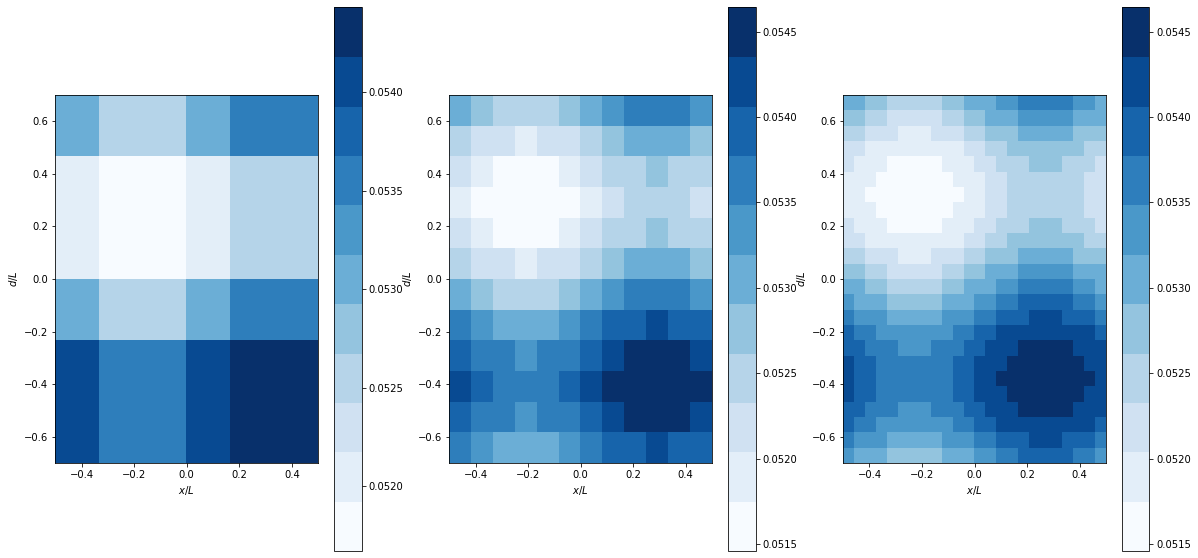

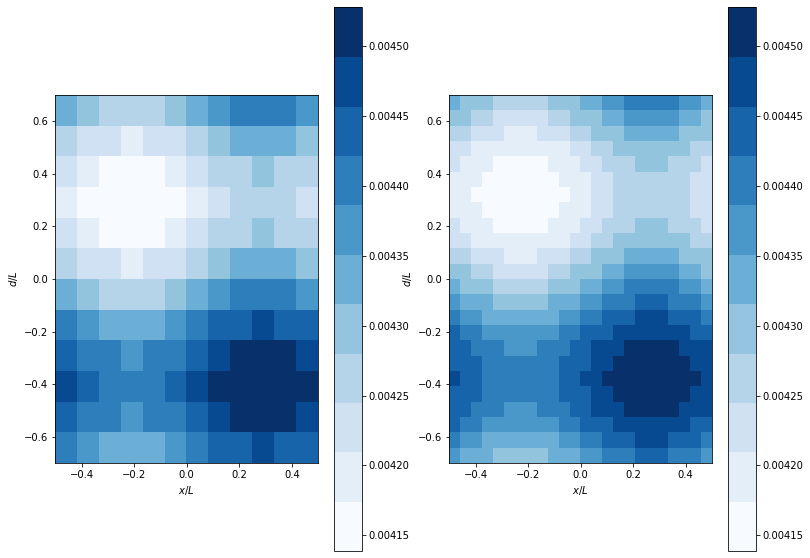

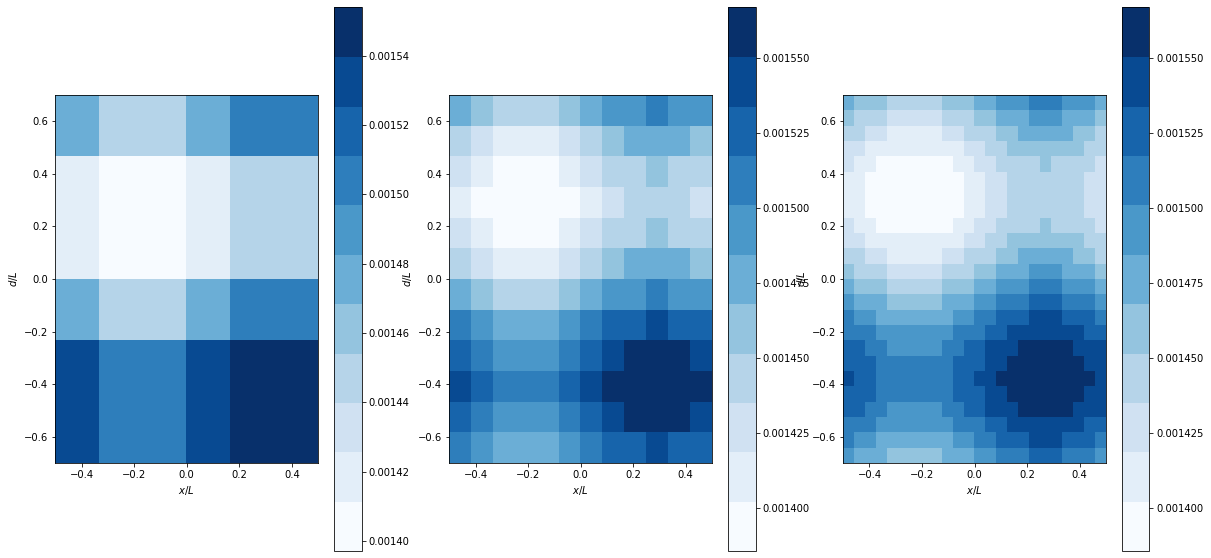

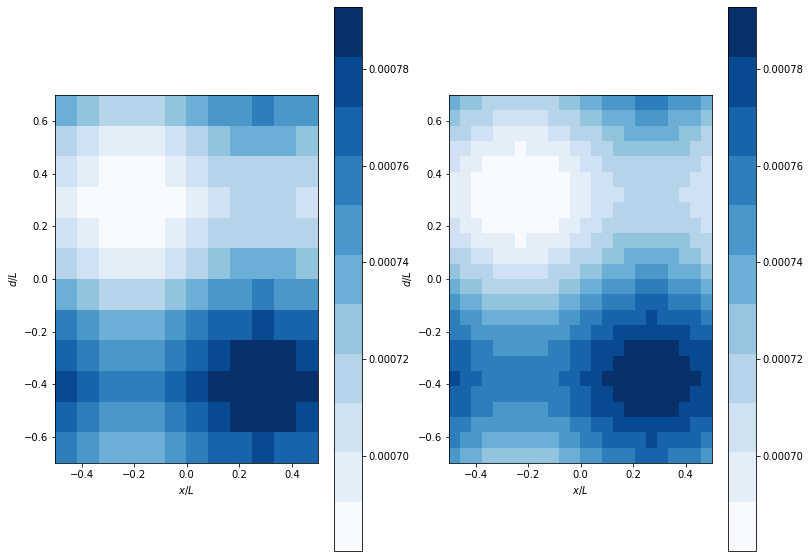

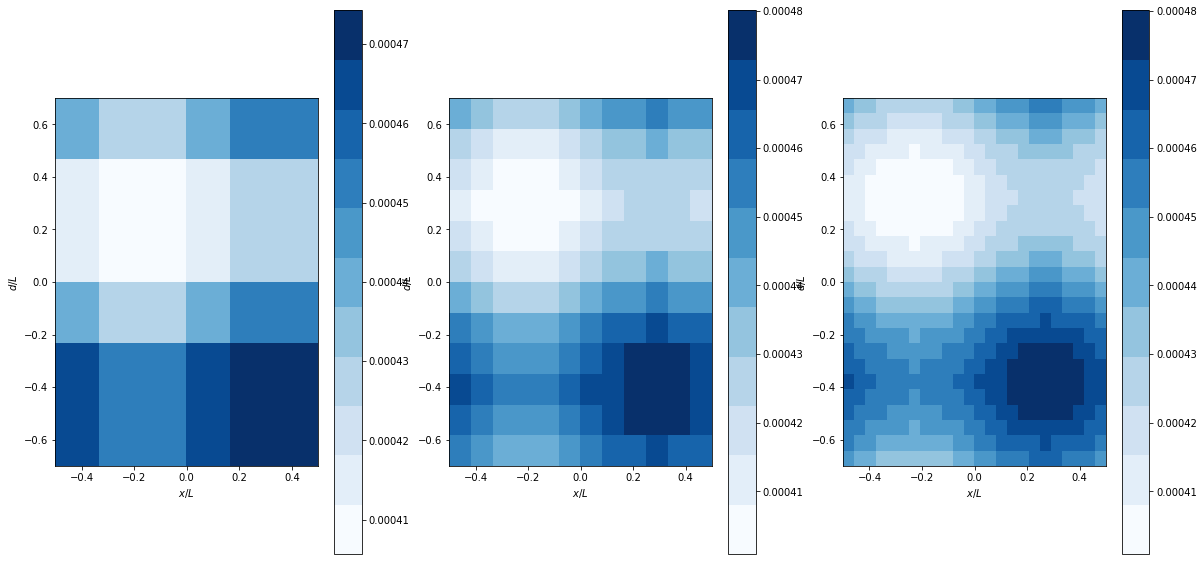

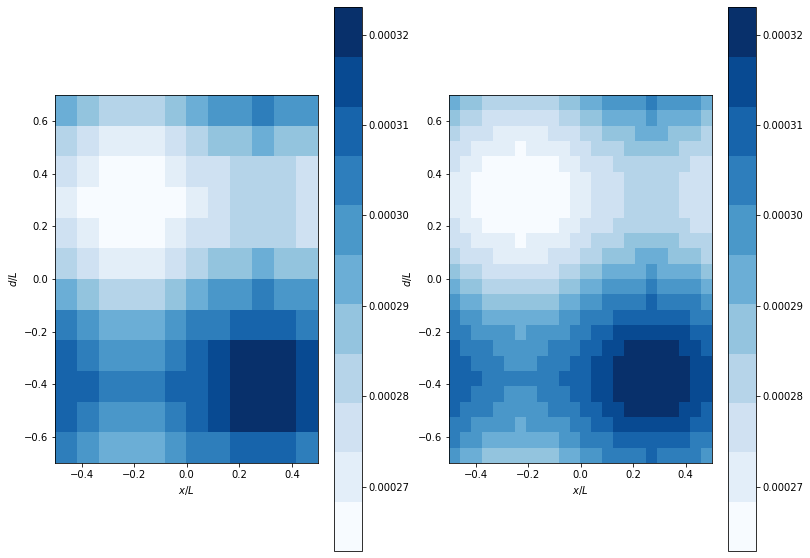

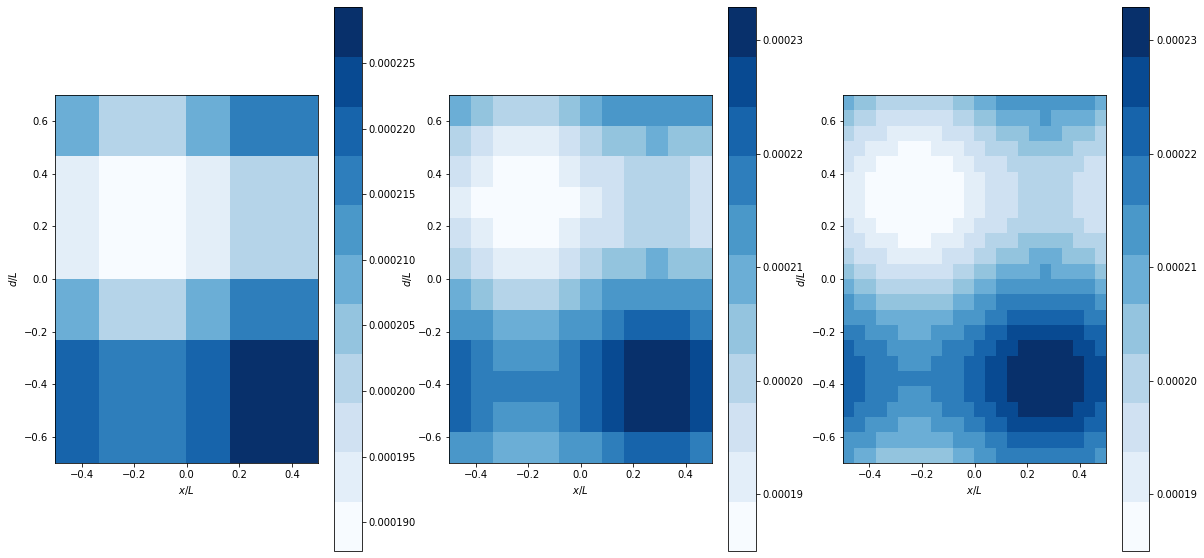

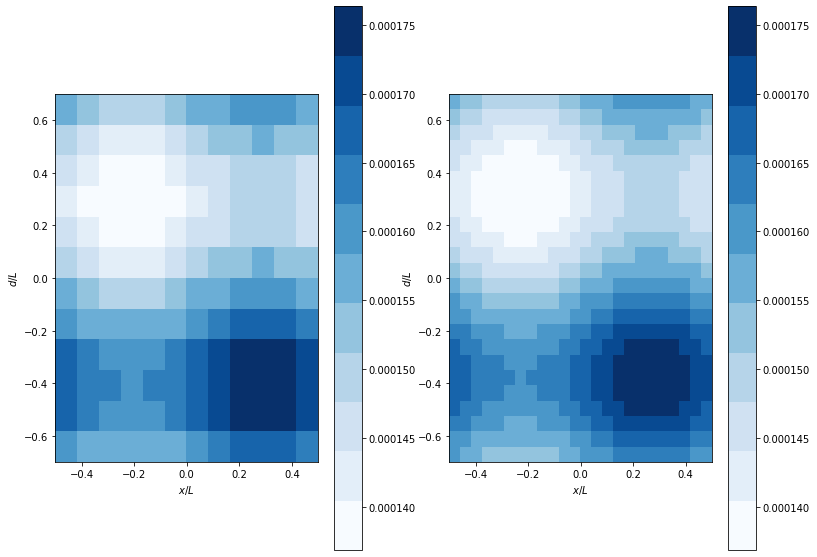

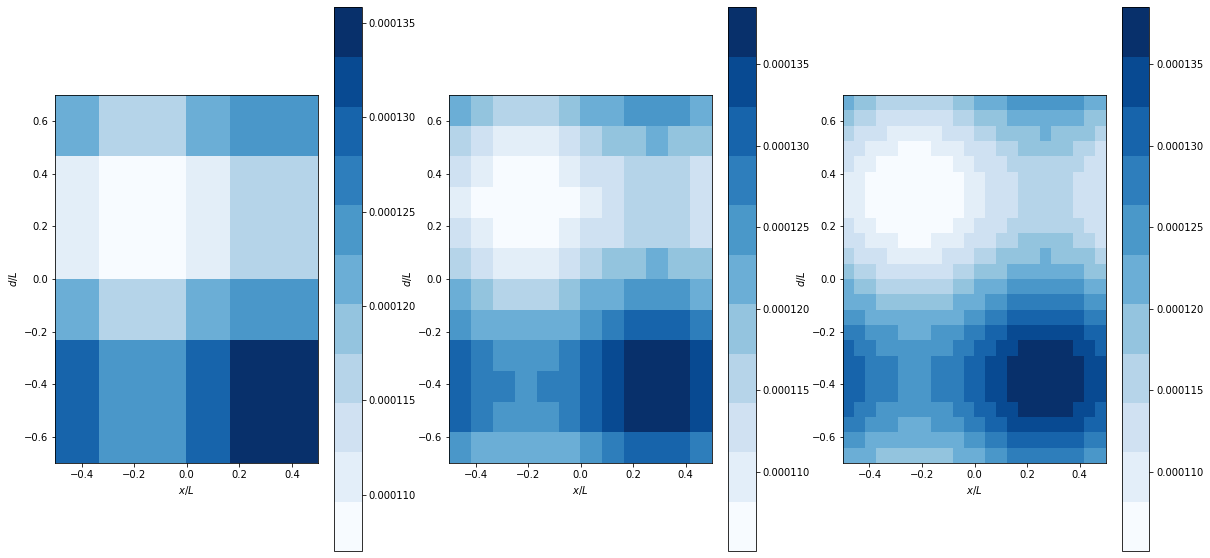

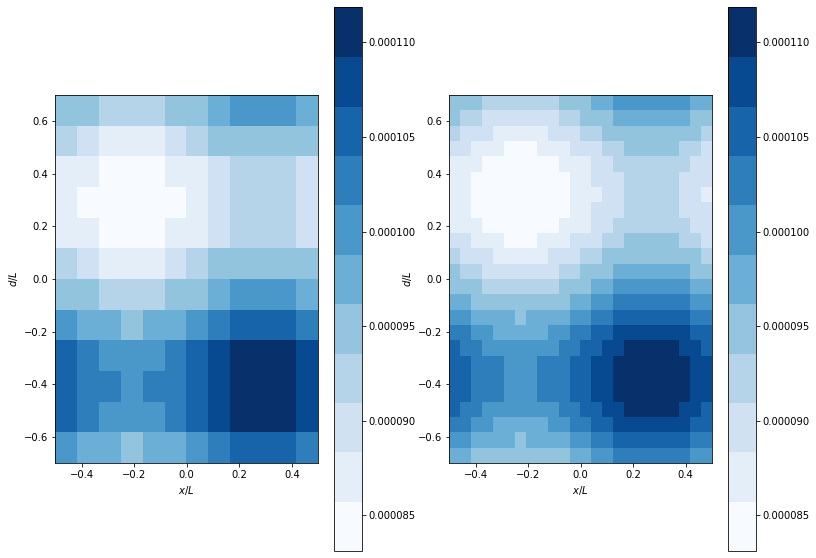

In [25]:
def plot_val(data):
        #Take diag
        dim = np.shape(data)[0]
        datax = np.zeros([dim, dim])
        for j in range(dim):
            datax[j] = data[:, j, j]

        #Plot axis
        xmax = 0.5
        ymax = 0.7

        #Plot
        
        plt.imshow(datax, extent=[-xmax, xmax, -ymax, ymax], cmap=plt.cm.get_cmap('Blues', 11))
        plt.colorbar()
        plt.xlabel(r'$x/L$')
        plt.ylabel(r'$d/L$')

p = param.dust()
itlen = np.arange(10)*p.h5_every
for it in itlen:
    f = h5py.File('{}_it_{:06d}.hdf5'.format(p.H_path+p.dr,it), 'r')
    plt.figure(figsize=(20, 10))
    try:
        rho0 = np.array(f['CT_DUST::rho it={} tl=0 rl=0'.format(it)])[p.nbrG:-p.nbrG, p.nbrG:-p.nbrG, p.nbrG:-p.nbrG]
        plt.subplot(131)
        plot_val(rho0)
        print(np.shape(rho0))
    except:
        print()
    try:
        rho1 = np.array(f['CT_DUST::rho it={} tl=0 rl=1'.format(it)])[p.nbrG:-p.nbrG, p.nbrG:-p.nbrG, p.nbrG:-p.nbrG]
        plt.subplot(132)
        plot_val(rho1)
        print(np.shape(rho1))
    except:
        print()
    try:
        rho2 = np.array(f['CT_DUST::rho it={} tl=0 rl=2'.format(it)])[p.nbrG:-p.nbrG, p.nbrG:-p.nbrG, p.nbrG:-p.nbrG]
        plt.subplot(133)
        plot_val(rho2)
        print(np.shape(rho2))
    except:
        print()
    print('--------')
    
    
    

In [3]:
a = ['bla', 'non', 'maybe']
b = [ai for ai in a if 'a' in ai]
print(b)

['bla', 'maybe']
